Simple Lasso and Ridge Regularization

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#Read the dataset 

df = pd.read_csv("/Users/karnikabhardwaj/Downloads/Boston_housing.csv")

In [4]:
#Get the quick look at the data
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#Select a subframe of predictors

X = df[['crim','indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio','black', 'lstat']]

#Normalize the values of the dataframe
X_norm = preprocessing.normalize(X)

#select medv as the response variable
y = df['medv']


In [7]:
#Split the dataset into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_norm,y,train_size = 0.7, random_state = 31)


In [8]:
# Multiple Regression Analysis

#fit a linear regression model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

#predict on the validation set

y_val_pred = lreg.predict(X_val)

In [9]:
#Computing the MSE for multi-regression 

#Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val_pred, y_val)

#print the MSE values
print("Multi-linear regression MSE is ", mse)

Multi-linear regression MSE is  20.13395137516532


In [10]:
#Obtaining the coefficients of the predictors 

#make a dictionary of the coefficients along the predictors as key 
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

#Linear Regression coefficients values to plot
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())


In [11]:
#Implementing LASSO Regularization

#use alpha = 0.008
lasso_reg = Lasso(alpha = 0.008)

#fit on the training data
lasso_reg.fit(X_train, y_train)

#make a predcition on the validation data using the above trained model
y_val_pred = lasso_reg.predict(X_val)

In [12]:
#computing the MSE with LASSO regularization
mse_lasso = mean_squared_error(y_val_pred, y_val)

print("Lasso validation set hava MSE, ", mse_lasso)

Lasso validation set hava MSE,  31.676774400084444


In [13]:
#Obtaining the coefficients of the predictors

lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_)))

#lasso regularization coefficient values to plot

lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

In [14]:
#Implementing Ridge Regularization
ridgeReg = Ridge(alpha = 0.008)

#fit the model on the training data
ridgeReg.fit(X_train, y_train)

#predict the model on the validation data
y_val_pred = ridgeReg.predict(X_val)

In [15]:
#Computing the MSE for Ridge Regression
mse_ridge = mean_squared_error(y_val_pred, y_val)
print("The MSE of Ridge Validation set is", mse_ridge)

The MSE of Ridge Validation set is 28.05365901018082


In [16]:
#Obtaining the coefficients of the predictors

ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_)))

#Ridge regularisation coefficient values to plot

ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())


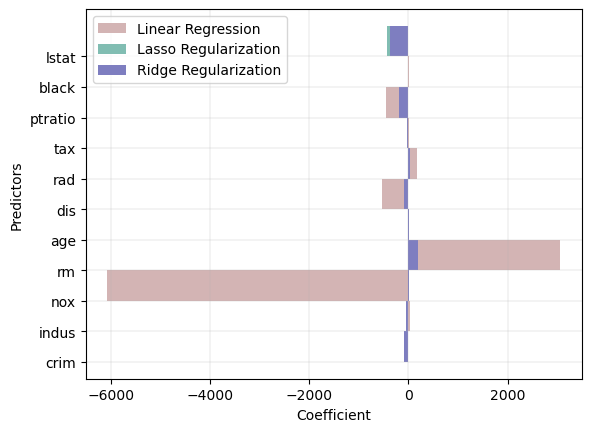

In [17]:
#Plot the graph

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,1.0, align='edge',color="#81BDB2", label="Lasso Regularization")
plt.barh(ridge_x,ridge_y,1.0, align='edge',color="#7E7EC0", label="Ridge Regularization")
plt.grid(linewidth = 0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc = "best")
plt.xlim(-6500, 3500)
plt.show()